In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import Dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# import Data
vgd_df = pd.read_csv(r"E:\final\Temp_database.csv")


In [4]:
# Display Data 
vgd_df.head()

,Game,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,PS4,2018.0,Action,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,PS4,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,PS4,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
# Drop the non-beneficial
vgd_df.drop(['Publisher'], axis=1, inplace=True)

In [6]:
# Combine Global and rest of world 
vgd_df['other countries'] = vgd_df['Rest of World'] + vgd_df['Global']



In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
vgd_df.drop(['Global','Rest of World'], axis=1, inplace=True)

In [8]:
vgd_df.head()

,Game,Platform,Year,Genre,North America,Europe,Japan,other countries
0,Grand Theft Auto V,PS4,2014.0,Action,6.06,9.71,0.60,22.41
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.18,6.05,0.41,17.53
2,Red Dead Redemption 2,PS4,2018.0,Action,5.26,6.21,0.21,16.20
3,Call of Duty: WWII,PS4,2017.0,Shooter,4.67,6.21,0.40,15.52
4,FIFA 18,PS4,2017.0,Sports,1.27,8.64,0.15,13.53


In [9]:
# Inspecting the data
vgd_df.shape

(2823, 8)

In [11]:
vgd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Game             2823 non-null   object 
 1   Platform         2823 non-null   object 
 2   Year             2597 non-null   float64
 3   Genre            2823 non-null   object 
 4   North America    2823 non-null   float64
 5   Europe           2823 non-null   float64
 6   Japan            2823 non-null   float64
 7   other countries  2823 non-null   float64
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [12]:
vgd_df.describe()

,Year,North America,Europe,Japan,other countries
count,2597.00000,2823.000000,2823.000000,2823.000000,2823.000000
mean,2012.99692,0.374658,0.209809,0.018169,0.533705
std,5.39574,1.507118,0.626146,0.072672,1.438324
min,1984.00000,0.000000,0.000000,0.000000,0.000000
25%,2011.00000,0.000000,0.000000,0.000000,0.020000
50%,2015.00000,0.020000,0.020000,0.000000,0.070000
75%,2016.00000,0.180000,0.130000,0.000000,0.360000
max,2022.00000,42.000000,9.710000,2.170000,22.410000


In [13]:
# Examine data for Null variables

vgd_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Game  Platform   Year  Genre  North America  Europe  Japan  \
0     False     False  False  False          False   False  False   
1     False     False  False  False          False   False  False   
2     False     False  False  False          False   False  False   
3     False     False  False  False          False   False  False   
4     False     False  False  False          False   False  False   
...     ...       ...    ...    ...            ...     ...    ...   
2818  False     False  False  False          False   False  False   
2819  False     False  False  False          False   False  False   
2820  False     False  False  False          False   False  False   
2821  False     False  False  False          False   False  False   
2822  False     False  False  False          False   False  False   

      other countries  
0               False  
1               False  
2               False  
3            

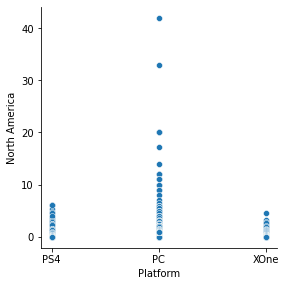

In [14]:
# NA Sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='North America', height=4, aspect=1, kind='scatter')
plt.show()

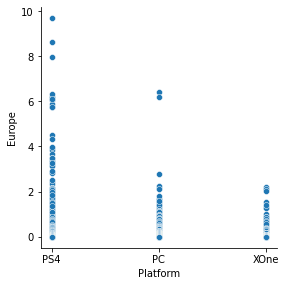

In [15]:
# EU sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='Europe', height=4, aspect=1, kind='scatter')
plt.show()

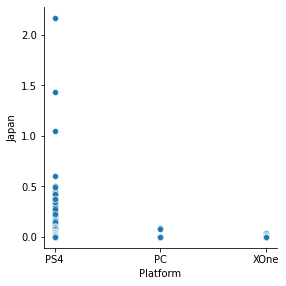

In [16]:
# Japan sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='Japan', height=4, aspect=1, kind='scatter')
plt.show()

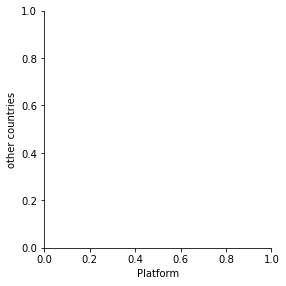

In [18]:
# Other Countries sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='other countries', height=4, aspect=1, kind='Genre')
plt.show()

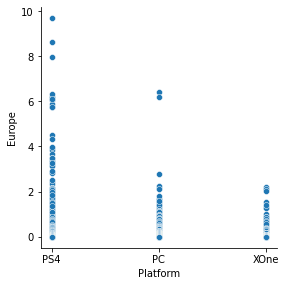

In [19]:
# EU sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='Europe', height=4, aspect=1, kind='scatter')
plt.show()

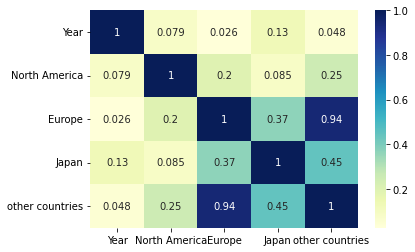

In [20]:
#relationship variables
sns.heatmap(vgd_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

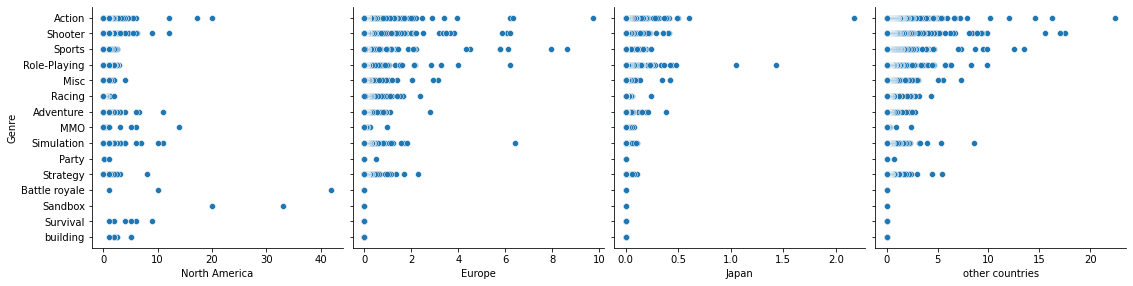

In [21]:

sns.pairplot(vgd_df, x_vars=['North America', 'Europe', 'Japan', 'other countries'], y_vars='Genre', height=4, aspect=1, kind='scatter')
plt.show()

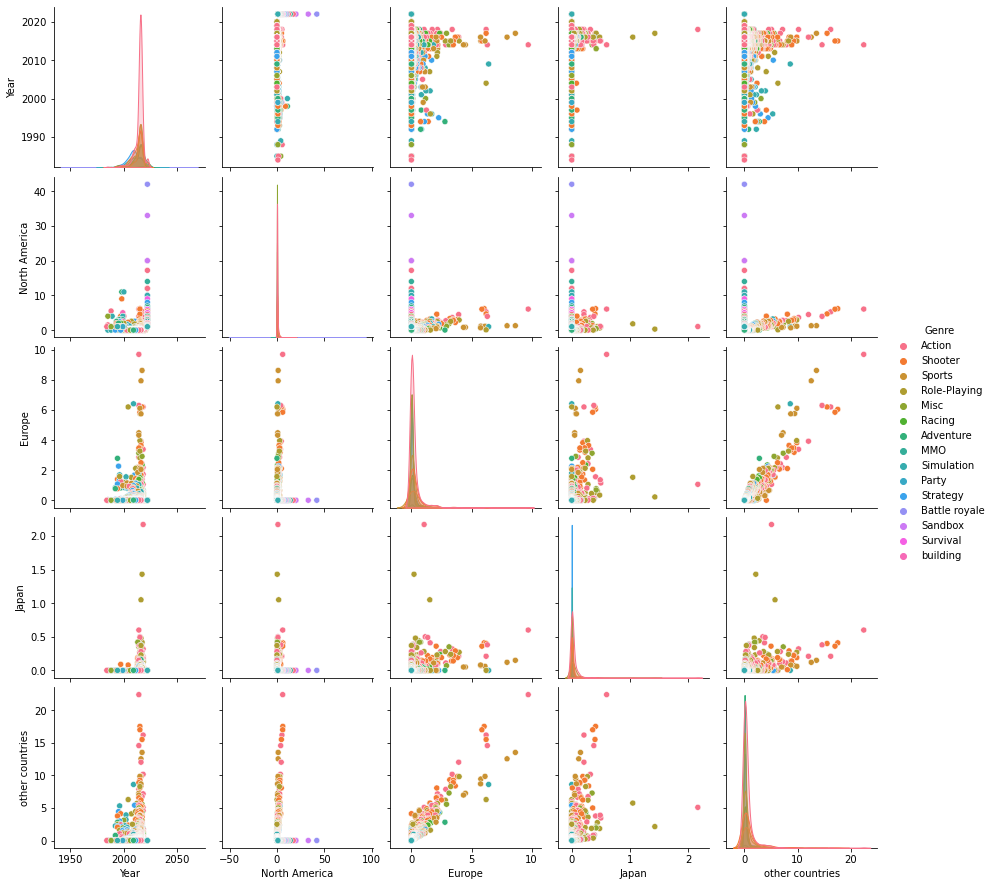

In [53]:
sns.pairplot(vgd_df,hue='Genre')

In [51]:
vgd_df.corr()


,Year,North America,Europe,Japan,other countries
Year,1.000000,0.079217,0.025912,0.128074,0.047981
North America,0.079217,1.000000,0.195637,0.085489,0.251000
Europe,0.025912,0.195637,1.000000,0.366600,0.940676
Japan,0.128074,0.085489,0.366600,1.000000,0.447238
other countries,0.047981,0.251000,0.940676,0.447238,1.000000
